In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [90]:
variation_test_csv = pd.read_csv('csv_files/df_final_experiment_clients.txt')

In [91]:
variation_test_csv.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [92]:
footprint1_csv = pd.read_csv('csv_files/df_final_web_data_pt_1.txt')

In [93]:
footprint1_csv.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [94]:
footprint2_csv = pd.read_csv('csv_files/df_final_web_data_pt_2.txt')

In [95]:
footprint2_csv.shape

(412264, 5)

In [96]:
footprint2_csv.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [97]:
customer_csv = pd.read_csv('csv_files/df_final_demo.txt')

In [98]:
customer_csv.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [99]:
footprint_csv = pd.concat([footprint1_csv, footprint2_csv], ignore_index=True)

In [100]:
footprint_csv.shape

(755405, 5)

In [101]:
footprint_csv["process_step"].value_counts() 

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [102]:
process_replace = {"start": 0, "step_1": 1, "step_2": 2, "step_3": 3, "confirm": 4}

In [103]:
footprint_csv["process_step"]= footprint_csv["process_step"].replace(process_replace)

C:\Users\greta\AppData\Local\Temp\ipykernel_46632\3095718887.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  footprint_csv["process_step"]= footprint_csv["process_step"].replace(process_replace)


In [104]:
footprint_csv["process_step"].value_counts() 

process_step
0    243945
1    163193
2    133062
3    112242
4    102963
Name: count, dtype: int64

In [105]:
variation_test_csv["Variation"].isna().sum()

20109

In [106]:
variation_test_csv["Variation"].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [107]:
variation_replace = {"Test": 1, "Control": 0}

In [108]:
variation_test_csv["Variation"]= variation_test_csv["Variation"].replace(variation_replace)

C:\Users\greta\AppData\Local\Temp\ipykernel_46632\1689626888.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  variation_test_csv["Variation"]= variation_test_csv["Variation"].replace(variation_replace)


In [109]:
variation_test_csv["Variation"].value_counts()

Variation
1.0    26968
0.0    23532
Name: count, dtype: int64

In [110]:
variation_test_csv["Variation"].isna().sum()

20109

In [111]:
#drop null values in variation colums
variation_test_csv = variation_test_csv.dropna(subset=['Variation'])

In [112]:
variation_test_csv["Variation"].isna().sum()

0

In [113]:
#convertir variation a int
variation_test_csv["Variation"] = variation_test_csv["Variation"].astype(int)

In [114]:
variation_test_csv["Variation"].value_counts()

Variation
1    26968
0    23532
Name: count, dtype: int64

In [115]:
customer_csv["clnt_tenure_yr"].isna().sum()

14

In [116]:
customer_csv = customer_csv.dropna(subset=['clnt_tenure_yr'])

In [117]:
customer_csv["clnt_tenure_yr"] = customer_csv["clnt_tenure_yr"].astype(int)

In [118]:
customer_csv["clnt_tenure_mnth"].isna().sum()

0

In [119]:
customer_csv["clnt_tenure_mnth"] = customer_csv["clnt_tenure_mnth"].astype(int)

In [120]:
#num_accts
customer_csv["num_accts"].isna().sum()	

0

In [121]:
customer_csv["num_accts"] = customer_csv["num_accts"].astype(int)

In [122]:
#calls_6_mnth
customer_csv["calls_6_mnth"].isna().sum()

0

In [123]:
customer_csv["calls_6_mnth"] = customer_csv["calls_6_mnth"].astype(int)

In [124]:
#logons_6_mnth
customer_csv["logons_6_mnth"].isna().sum()

0

In [125]:
customer_csv["logons_6_mnth"] = customer_csv["logons_6_mnth"].astype(int)

In [126]:
customer_csv.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60.5,U,2,45105.30,6,9
1,2304905,7,94,58.0,U,2,110860.30,6,9
2,1439522,5,64,32.0,U,2,52467.79,6,9
3,1562045,16,198,49.0,M,2,67454.65,3,6
4,5126305,12,145,33.0,F,2,103671.75,0,3


In [127]:
footprint_csv.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04


In [128]:
variation_test_csv.head()

,client_id,Variation
0,9988021,1
1,8320017,1
2,4033851,0
3,1982004,1
4,9294070,0


In [129]:
variation_test_csv.rename(columns={'Variation': 'variation'}, inplace=True)

In [130]:
footprint_csv["process_step"].isna().sum()

0

In [131]:
print(footprint_csv.columns)
print(variation_test_csv.columns)

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')
Index(['client_id', 'variation'], dtype='object')


In [132]:
df=pd.merge(footprint_csv, variation_test_csv, on='client_id', how='left')    
df
#podemos ver que al haber valores NaN en la columna variation, 
# los int se han convertido en float

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,1.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,1.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,1.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,1.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,1.0
...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:46:10,NaN
755401,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:45:29,NaN
755402,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:44:51,NaN
755403,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:44:34,NaN


In [133]:
# este es el df de aquellos clientes que no tienen asignado un valor en la columna variation
# con lo cual no aportan información en cuanto al AB testing
missing_variation = footprint_csv[~footprint_csv['client_id'].isin(variation_test_csv['client_id'])]
missing_variation

,client_id,visitor_id,visit_id,process_step,date_time
245,8932927,485163175_18149554449,883578716_57691052399_945047,1,2017-04-13 22:37:49
270,1208567,490822748_12476046982,63636232_1058424732_545130,0,2017-04-24 14:03:26
356,9838496,408959474_91766774102,687233905_42314307889_453394,0,2017-03-24 21:26:14
863,2353261,387293592_26815377704,269923351_29360137819_823850,1,2017-03-20 16:07:22
864,2353261,387293592_26815377704,269923351_29360137819_823850,4,2017-03-20 16:05:07
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:44:34


In [134]:
# volvemos a eliminar las filas con valores nulos en variation
# con la seguridad de que están guardados en missing_variation
# y convertimos en int 
df.dropna(subset=['variation'],inplace=True)
df['variation']=df['variation'].astype(int)
df

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,1
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,1
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,1
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,1
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,1
...,...,...,...,...,...,...
637487,1574008,117364417_77840596075,528720790_71583064618_169151,0,2017-05-06 23:43:27,1
637532,2908510,814969699_90652851448,562606085_36368381773_92090,0,2017-05-10 22:57:17,0
637533,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:31,0
637534,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:56:23,0


In [135]:
df=pd.merge(df,customer_csv, on='client_id', how='left')
#hacemos merge del último data set que quedaba 
df

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,1,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,1,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,1,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,1,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,1,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,0,2017-05-06 23:43:27,1,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
321305,2908510,814969699_90652851448,562606085_36368381773_92090,0,2017-05-10 22:57:17,0,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321306,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:31,0,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321307,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:56:23,0,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


In [136]:
# filtramos clientes con edades fuera del rango [18, 100]
outliers_age = df[(df['clnt_age'] < 18) | (df['clnt_age'] > 100)]
# mostramos los clientes con edades fuera de ese rango
outliers_age 
#podemos ver que hay clientes menores de 18, qué hacer con eso? 

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
14301,7953598,296570437_8947497590,928096978_81631802536_150914,4,2017-04-05 12:31:19,1,4.0,58.0,17.5,U,2.0,40087.02,0.0,3.0
14302,7953598,296570437_8947497590,121870082_38694571953_437422,4,2017-04-04 12:02:28,1,4.0,58.0,17.5,U,2.0,40087.02,0.0,3.0
14303,7953598,296570437_8947497590,121870082_38694571953_437422,4,2017-04-04 11:58:14,1,4.0,58.0,17.5,U,2.0,40087.02,0.0,3.0
14304,7953598,296570437_8947497590,121870082_38694571953_437422,3,2017-04-04 11:57:28,1,4.0,58.0,17.5,U,2.0,40087.02,0.0,3.0
14305,7953598,296570437_8947497590,121870082_38694571953_437422,2,2017-04-04 11:51:30,1,4.0,58.0,17.5,U,2.0,40087.02,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289099,2771150,945605144_28486695653,970471648_94457270213_396138,3,2017-06-18 11:35:59,0,22.0,270.0,17.0,M,2.0,28804.77,4.0,7.0
289100,2771150,945605144_28486695653,970471648_94457270213_396138,2,2017-06-18 11:34:40,0,22.0,270.0,17.0,M,2.0,28804.77,4.0,7.0
289101,2771150,945605144_28486695653,970471648_94457270213_396138,1,2017-06-18 11:34:06,0,22.0,270.0,17.0,M,2.0,28804.77,4.0,7.0
289102,2771150,945605144_28486695653,970471648_94457270213_396138,0,2017-06-18 11:33:52,0,22.0,270.0,17.0,M,2.0,28804.77,4.0,7.0


In [137]:
df.isnull().sum()
#vemos que tenemos algunas filas con valores nulos pero no son muchos


client_id             0
visitor_id            0
visit_id              0
process_step          0
date_time             0
variation             0
clnt_tenure_yr      102
clnt_tenure_mnth    102
clnt_age            114
gendr               102
num_accts           102
bal                 102
calls_6_mnth        102
logons_6_mnth       102
dtype: int64

In [138]:
client_analysis_df = df.dropna().copy()
#este .copy() sirve para evitar unas advertencias que saldrían en el siguiente paso

In [139]:

client_analysis_df.dropna(subset=['clnt_age'],inplace=True)
client_analysis_df['clnt_age']=client_analysis_df['clnt_age'].astype(int)
client_analysis_df["clnt_tenure_mnth"] = client_analysis_df["clnt_tenure_mnth"].astype(int)
client_analysis_df["num_accts"] = client_analysis_df["num_accts"].astype(int)
client_analysis_df["calls_6_mnth"] = client_analysis_df["calls_6_mnth"].astype(int)
client_analysis_df["logons_6_mnth"] = client_analysis_df["logons_6_mnth"].astype(int)

#todas las conversiones que hemos hecho anteriormente a int no habían servido de mucho

In [140]:
client_analysis_df

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,1,5.0,64,79,U,2,189023.86,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,1,5.0,64,79,U,2,189023.86,1,4
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,1,5.0,64,79,U,2,189023.86,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,1,5.0,64,79,U,2,189023.86,1,4
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,1,5.0,64,79,U,2,189023.86,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,0,2017-05-06 23:43:27,1,10.0,121,55,U,2,153238.83,3,6
321305,2908510,814969699_90652851448,562606085_36368381773_92090,0,2017-05-10 22:57:17,0,21.0,252,34,M,3,141808.05,6,9
321306,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:31,0,21.0,252,34,M,3,141808.05,6,9
321307,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:56:23,0,21.0,252,34,M,3,141808.05,6,9


In [141]:
unique_client_analysis_df = client_analysis_df.groupby('client_id').agg({
    'gendr': 'last',  # He comprobado que no hay clientes que cambien pero por si acaso
    'clnt_age': 'first',             
    'logons_6_mnth': 'first', 
    'clnt_tenure_yr':'first',
    'clnt_tenure_mnth': 'first',
    'num_accts':'first',
    'bal':'first',
    'calls_6_mnth':'first',
    'logons_6_mnth':'first'    
}).reset_index()
unique_client_analysis_df
#he hecho un group by client_id ya que no me interesa para el analisis del tipo de cliente
#que haya más de una fila por cada cliente, ya que datos del tipo edad, genero, etc, no 
#van a verse afectados. 

,client_id,gendr,clnt_age,logons_6_mnth,clnt_tenure_yr,clnt_tenure_mnth,num_accts,bal,calls_6_mnth
0,555,U,29,6,3.0,46,2,25454.66,2
1,647,M,57,4,12.0,151,2,30525.80,0
2,934,F,51,3,9.0,109,2,32522.88,0
3,1028,M,36,4,12.0,145,3,103520.22,1
4,1104,U,48,9,5.0,66,3,154643.94,6
...,...,...,...,...,...,...,...,...,...
50482,9999150,U,30,9,5.0,66,3,97141.71,6
50483,9999400,U,28,3,7.0,86,2,51787.04,0
50484,9999626,M,35,9,9.0,113,2,36642.88,6
50485,9999729,F,31,9,10.0,124,3,107059.74,6


In [156]:
df

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,1,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,1,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,1,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,1,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,1,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,0,2017-05-06 23:43:27,1,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
321305,2908510,814969699_90652851448,562606085_36368381773_92090,0,2017-05-10 22:57:17,0,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321306,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:31,0,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321307,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:56:23,0,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


In [142]:
unique_client_analysis_df['gendr'].value_counts()

gendr
U    17280
M    16947
F    16258
X        2
Name: count, dtype: int64

In [143]:
unique_client_analysis_df.describe()

,client_id,clnt_age,logons_6_mnth,clnt_tenure_yr,clnt_tenure_mnth,num_accts,bal,calls_6_mnth
count,5.048700e+04,50487.000000,50487.000000,50487.000000,50487.000000,50487.000000,5.048700e+04,50487.000000
mean,5.006180e+06,47.058451,6.131856,12.031810,150.416365,2.254580,1.495168e+05,3.093272
std,2.877445e+06,15.528092,2.175441,6.860326,81.945403,0.533675,3.020390e+05,2.188009
min,5.550000e+02,17.000000,3.000000,2.000000,33.000000,1.000000,2.378944e+04,0.000000
25%,2.515688e+06,33.000000,4.000000,6.000000,82.000000,2.000000,3.987718e+04,1.000000
50%,5.025043e+06,48.000000,6.000000,11.000000,136.000000,2.000000,6.573433e+04,3.000000
75%,7.477922e+06,59.000000,8.000000,16.000000,192.000000,2.000000,1.399583e+05,5.000000
max,9.999832e+06,96.000000,9.000000,55.000000,669.000000,7.000000,1.632004e+07,6.000000


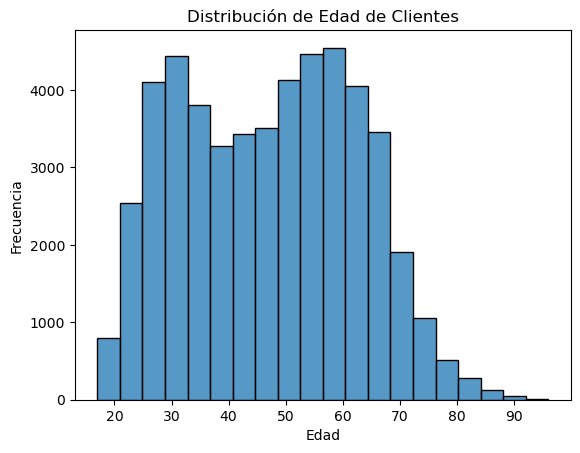

In [144]:
sns.histplot(unique_client_analysis_df['clnt_age'], bins=20)
plt.title('Distribución de Edad de Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

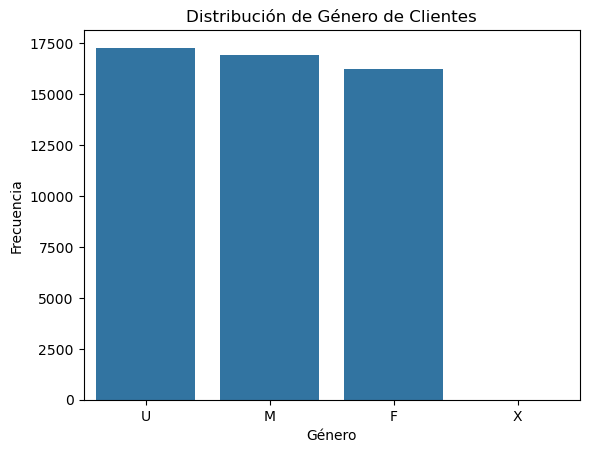

In [145]:
sns.countplot(data=unique_client_analysis_df, x='gendr')
plt.title('Distribución de Género de Clientes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

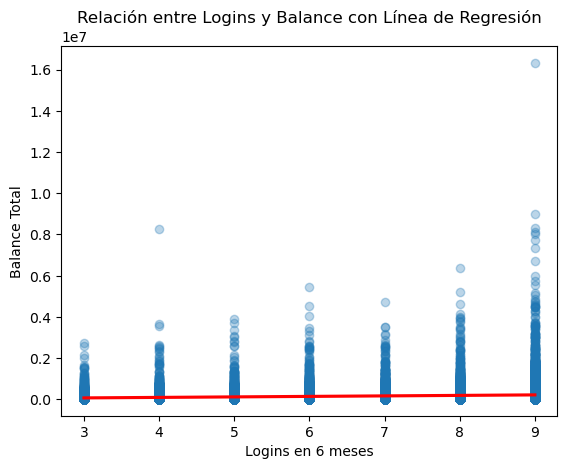

In [146]:
sns.regplot(data=unique_client_analysis_df, x='logons_6_mnth', y='bal', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relación entre Logins y Balance con Línea de Regresión')
plt.xlabel('Logins en 6 meses')
plt.ylabel('Balance Total')
plt.show()

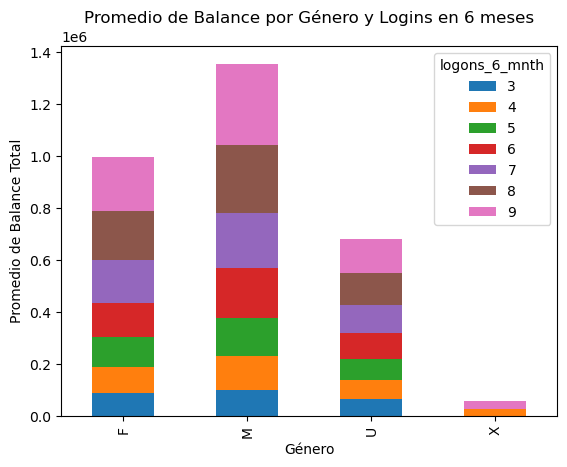

In [147]:
balance_gender_logons = unique_client_analysis_df.groupby(['gendr', 'logons_6_mnth'])['bal'].mean().unstack()

# Gráfico de barras apiladas
balance_gender_logons.plot(kind='bar', stacked=True)
plt.title('Promedio de Balance por Género y Logins en 6 meses')
plt.xlabel('Género')
plt.ylabel('Promedio de Balance Total')
plt.show()

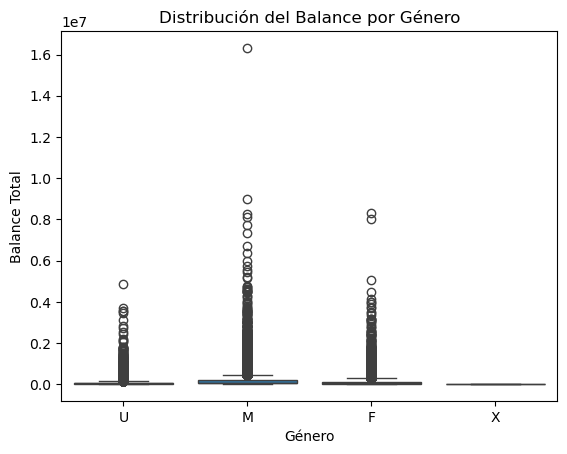

In [148]:
sns.boxplot(data=unique_client_analysis_df, x='gendr', y='bal')
plt.title('Distribución del Balance por Género')
plt.xlabel('Género')
plt.ylabel('Balance Total')
plt.show()

In [149]:
skewness_bal = unique_client_analysis_df['bal'].skew()
kurtosis_bal = unique_client_analysis_df['bal'].kurtosis()

print(f'skewness del balance: {skewness_bal}, hay un número significativo de clientes con balances muy altos')
print(f'Kurtosis del balance: {kurtosis_bal}, la distribución tiene una cantidad inusualmente alta de outliers.')

skewness_years = unique_client_analysis_df['clnt_tenure_yr'].skew()
kurtosis_years = unique_client_analysis_df['clnt_tenure_yr'].kurtosis()

print(f'skewness del clnt_tenure_yr: {skewness_years} hay un grupo pequeño de clientes leales que han estado mucho más tiempo en comparación con los nuevos clientes')
print(f'Kurtosis del clnt_tenure_yr: {kurtosis_years}, hay menos outliers en comparación con una distribución normal. La mayoría de los datos están más concentrados alrededor de la media')

skewness del balance: 11.47407650252342, hay un número significativo de clientes con balances muy altos
Kurtosis del balance: 294.1124758573803, la distribución tiene una cantidad inusualmente alta de outliers.
skewness del clnt_tenure_yr: 1.0317878940266119 hay un grupo pequeño de clientes leales que han estado mucho más tiempo en comparación con los nuevos clientes
Kurtosis del clnt_tenure_yr: 1.0179025974588907, hay menos outliers en comparación con una distribución normal. La mayoría de los datos están más concentrados alrededor de la media


In [150]:
#vamos a ver si hay relación entre el género y la Variation, no debería.

contingency_table_gender_variation = pd.crosstab(client_analysis_df['gendr'], client_analysis_df['variation'], normalize='columns')
chi2, p, dof, expected = chi2_contingency(contingency_table_gender_variation)
print(f'Chi2: {chi2}, P-value: {p}')
print("Tabla de Contingencia Normalizada:")
print(contingency_table_gender_variation)

Chi2: 0.00034921226276692855, P-value: 0.9999982645682544
Tabla de Contingencia Normalizada:
variation         0         1
gendr                        
F          0.318846  0.329411
M          0.336962  0.335739
U          0.344193  0.334805
X          0.000000  0.000045


In [151]:
# Calcular los grados de libertad
n_rows_gender_var = contingency_table_gender_variation.shape[0]  # Número de filas
n_col_gender_var = contingency_table_gender_variation.shape[1]  # Número de columnas

df_gender_var = (n_rows_gender_var - 1) * (n_col_gender_var - 1)

# Definir nivel de significancia
alpha = 0.05

# Calcular el valor crítico
valor_critico_gender_var = stats.chi2.ppf(1 - alpha, df_gender_var)
valor_critico_gender_var

7.814727903251179

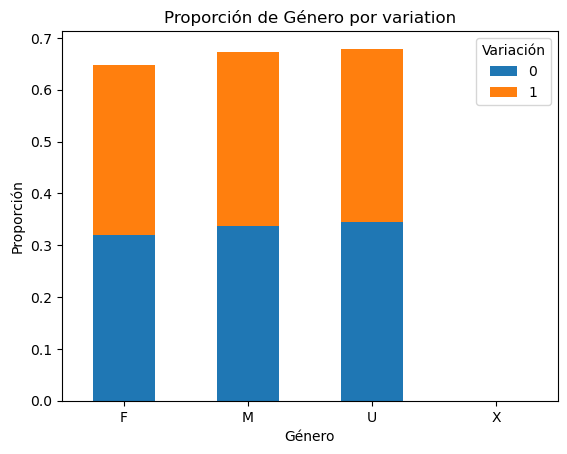

In [157]:
contingency_table_gender_variation.plot(kind='bar', stacked=True)
plt.title('Proporción de Género por variation')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Variación')
plt.show()

In [153]:
contingency_table_age_variation = pd.crosstab(client_analysis_df['clnt_age'], client_analysis_df['variation'], normalize='columns')
chi2, p, dof, expected = chi2_contingency(contingency_table_age_variation)
print(f'Chi2: {chi2}, P-value: {p}')
print("Tabla de Contingencia Normalizada:")
print(contingency_table_age_variation)

Chi2: 0.0038458457311099526, P-value: 1.0
Tabla de Contingencia Normalizada:
variation         0         1
clnt_age                     
17         0.001332  0.001350
18         0.002998  0.003352
19         0.004574  0.004320
20         0.006443  0.005591
21         0.007287  0.008336
...             ...       ...
92         0.000314  0.000141
93         0.000307  0.000084
94         0.000084  0.000101
95         0.000000  0.000034
96         0.000028  0.000034

[80 rows x 2 columns]


In [154]:
# Calcular los grados de libertad
n_rows_age_variation = contingency_table_age_variation.shape[0]  # Número de filas
n_col_age_variation = contingency_table_age_variation.shape[1]  # Número de columnas

df_age_variation = (n_rows_age_variation - 1) * (n_col_age_variation - 1)

In [155]:
# Definir nivel de significancia
alpha = 0.05

# Calcular el valor crítico
valor_critico_age_variation = stats.chi2.ppf(1 - alpha, df_age_variation)
valor_critico_age_variation

100.74861874635032

In [ ]:
#Who are the primary clients using this online process
#Are the primary clients younger or older, new or long-standing  #clnt_tenure_yr	clnt_tenure_mnth

In [170]:
unique_client_analysis_df.sort_values('bal', ascending=False).head(10)

,client_id,gendr,clnt_age,logons_6_mnth,clnt_tenure_yr,clnt_tenure_mnth,num_accts,bal,calls_6_mnth
46967,9286288,M,62,9,21.0,254,3,16320040.15,6
35733,7070097,M,53,9,11.0,133,2,8986419.77,6
47748,9440656,F,63,9,7.0,94,2,8292996.21,6
11501,2291985,M,41,4,7.0,85,2,8247729.97,1
8399,1678193,M,65,9,24.0,299,3,8137343.24,6
34140,6762377,F,41,9,16.0,193,3,8045102.60,6
17642,3519657,M,66,9,18.0,218,6,7741994.01,6
4950,987970,M,74,9,14.0,179,3,7339443.17,4
4313,857273,M,56,9,31.0,376,5,6716305.28,6
46993,9290030,M,67,8,28.0,341,4,6353000.43,5


In [173]:
#competion rate
df_process_step = df[df['process_step']==4]
df_process_step


,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
8,8320017,39393514_33118319366,960651974_70596002104_312201,4,2017-04-05 13:10:05,1,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
13,4033851,762728880_76361333336,949661017_22392791362_127391,4,2017-04-05 12:29:03,0,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
14,4033851,762728880_76361333336,949661017_22392791362_127391,4,2017-04-05 12:29:01,0,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
15,4033851,762728880_76361333336,949661017_22392791362_127391,4,2017-04-05 12:28:52,0,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
24,1982004,618934751_10082078917,132494692_73738638511_70823,4,2017-04-17 12:02:42,1,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321277,6230585,100189756_32488226026,671811152_97876326241_999687,4,2017-05-08 09:29:38,1,10.0,120.0,66.0,U,4.0,565825.41,3.0,6.0
321282,4977550,795300798_27713164444,423005536_66563748376_701196,4,2017-05-25 15:19:39,0,5.0,70.0,26.0,U,2.0,27772.76,6.0,9.0
321288,6426623,27047012_3402532492,685634090_42070675506_389171,4,2017-05-19 05:40:14,0,6.0,75.0,47.0,U,2.0,43854.27,5.0,8.0
321293,433098,5505424_50616523266,773565250_67577573147_389841,4,2017-05-13 15:33:04,0,6.0,73.0,25.0,U,2.0,34419.62,2.0,5.0


In [175]:
#competion rate
df_process_step_variation = df[df['process_step']==4].groupby('variation').count()
df_process_step_variation

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
variation,,,,,,,,,,,,,
0,17505,17505,17505,17505,17505,17499,17499,17498,17499,17499,17499,17499,17499
1,25722,25722,25722,25722,25722,25716,25716,25716,25716,25716,25716,25716,25716


In [176]:
#Time Spent on Each Step
df['date_time'].isnull().sum()

0

In [179]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce') 
invalid_dates = df[df['date_time'].isna()] 
if invalid_dates.empty: 
	print("Todos los valores están en el formato correcto.") 
else: 
	print("Hay valores que no están en el formato correcto:") 
	print(invalid_dates)

Todos los valores están en el formato correcto.


In [182]:
#competion rate
df_process_step_time = df.sort_values(by=['visit_id', 'variation', 'date_time'])
df_process_step_time.head(50)

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
106863,3561384,451664975_1722933822,100012776_37918976071_457913,4,2017-04-26 13:22:17,1,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0
106862,3561384,451664975_1722933822,100012776_37918976071_457913,4,2017-04-26 13:23:09,1,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0
236564,7338123,612065484_94198474375,100019538_17884295066_43909,0,2017-04-09 16:20:56,1,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
236563,7338123,612065484_94198474375,100019538_17884295066_43909,1,2017-04-09 16:21:12,1,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
236562,7338123,612065484_94198474375,100019538_17884295066_43909,2,2017-04-09 16:21:21,1,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
236561,7338123,612065484_94198474375,100019538_17884295066_43909,1,2017-04-09 16:21:35,1,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
236560,7338123,612065484_94198474375,100019538_17884295066_43909,1,2017-04-09 16:21:41,1,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
236559,7338123,612065484_94198474375,100019538_17884295066_43909,0,2017-04-09 16:21:45,1,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
236558,7338123,612065484_94198474375,100019538_17884295066_43909,0,2017-04-09 16:21:59,1,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
236557,7338123,612065484_94198474375,100019538_17884295066_43909,1,2017-04-09 16:22:04,1,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0


,variation,process_step,avg_time_in_step
0,0,0,0 days 00:02:05.633547571
1,0,1,0 days 00:00:44.102644451
2,0,2,0 days 00:00:38.552075657
3,0,3,0 days 00:01:32.140040887
4,0,4,0 days 00:02:22.608408124
5,1,0,0 days 00:02:05.195096016
6,1,1,0 days 00:00:37.755367818
7,1,2,0 days 00:00:47.705717753
8,1,3,0 days 00:01:35.471298216
9,1,4,0 days 00:03:02.905879563
